/tmp/ipython-input-6-3026852148.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_votes.values, y=cuisine_votes.index, palette='mako')


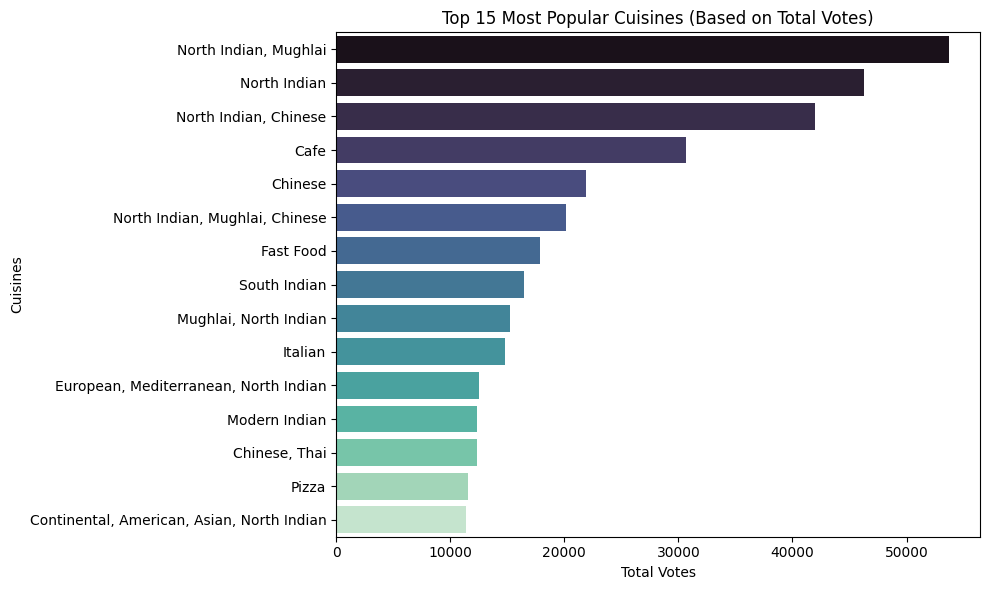

/tmp/ipython-input-6-3026852148.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Rating', y='Cuisines', data=top_rated_cuisines, palette='viridis')


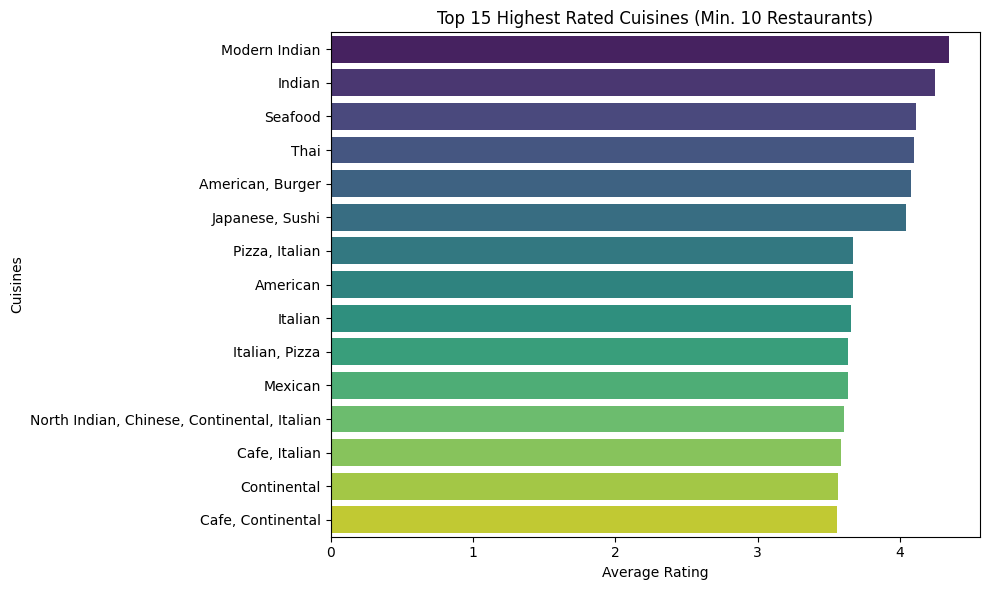

/tmp/ipython-input-6-3026852148.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cuisines', y='Aggregate rating', data=df[df['Cuisines'].isin(top5_cuisines)], palette='mako')


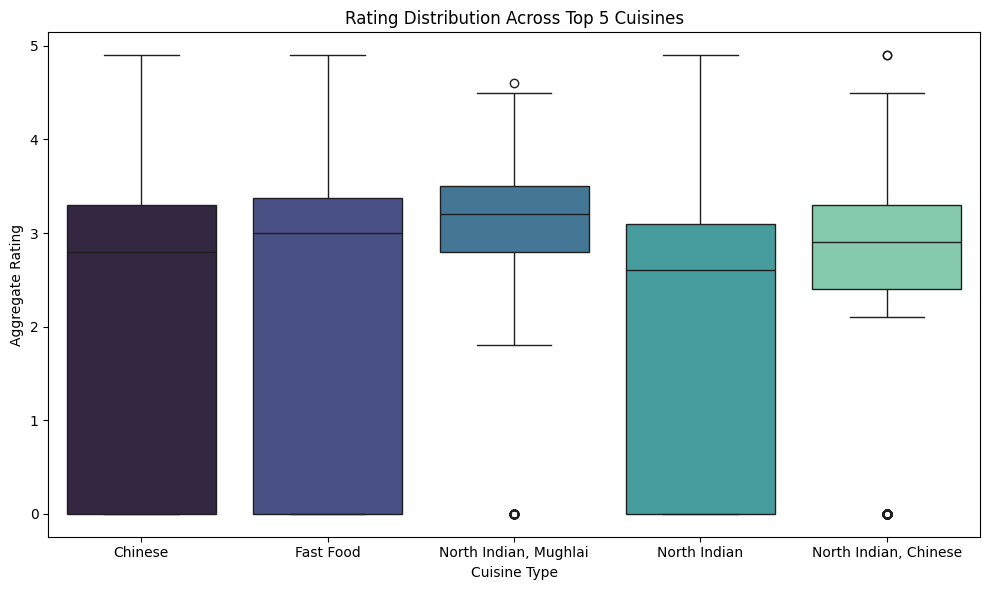

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Dataset .csv')
df.columns = df.columns.str.strip()
df = df.dropna(subset=['Cuisines', 'Aggregate rating', 'Votes'])

df['Cuisines'] = df['Cuisines'].str.strip()
df = df.drop_duplicates()

cuisine_votes = (
    df.groupby('Cuisines')['Votes']
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=cuisine_votes.values, y=cuisine_votes.index, palette='mako')
plt.title('Top 15 Most Popular Cuisines (Based on Total Votes)')
plt.xlabel('Total Votes')
plt.ylabel('Cuisines')
plt.tight_layout()
plt.show()

cuisine_rating = (
    df.groupby('Cuisines')
    .agg({'Aggregate rating': ['mean', 'count']})
    .reset_index()
)

cuisine_rating.columns = ['Cuisines', 'Avg_Rating', 'Count']
top_rated_cuisines = cuisine_rating[cuisine_rating['Count'] > 10] \
    .sort_values('Avg_Rating', ascending=False) \
    .head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x='Avg_Rating', y='Cuisines', data=top_rated_cuisines, palette='viridis')
plt.title('Top 15 Highest Rated Cuisines (Min. 10 Restaurants)')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.show()

top5_cuisines = df['Cuisines'].value_counts().head(5).index.tolist()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=df[df['Cuisines'].isin(top5_cuisines)], palette='mako')
plt.title('Rating Distribution Across Top 5 Cuisines')
plt.xlabel('Cuisine Type')
plt.ylabel('Aggregate Rating')
plt.tight_layout()
plt.show()
